In [11]:
import cv2
import numpy as np
import PIL.Image as Image
from IPython.display import display

In [12]:
flower = cv2.imread('./xau.jpg')

In [13]:
flower.shape

(580, 578, 3)

In [14]:
flower_gray = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)

In [15]:
flower_gray.shape

(580, 578)

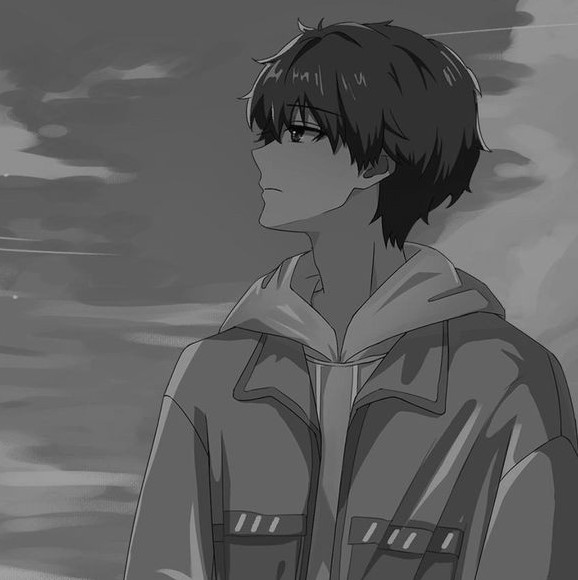

In [16]:
display(Image.fromarray(flower_gray))

In [17]:
filter = np.array([(1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1)]) * (1/25)

In [18]:
image_shape = flower_gray.shape
filter_shape = filter.shape

In [19]:
row = image_shape[0] + filter_shape[0] - 1
col = image_shape[1] + filter_shape[1] - 1
new_img_arr = np.zeros((row, col))

In [20]:
new_img_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        new_img_arr[i + int((filter_shape[0] - 1) // 2), j + int((filter_shape[1] - 1) // 2)] = flower_gray[i, j]

In [22]:
new_img_arr

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,  90., ..., 145.,   0.,   0.],
       ...,
       [  0.,   0., 153., ...,  68.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

# Arithmetic mean filter

In [23]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.sum(temp * filter)
        flower_gray[i, j] = res

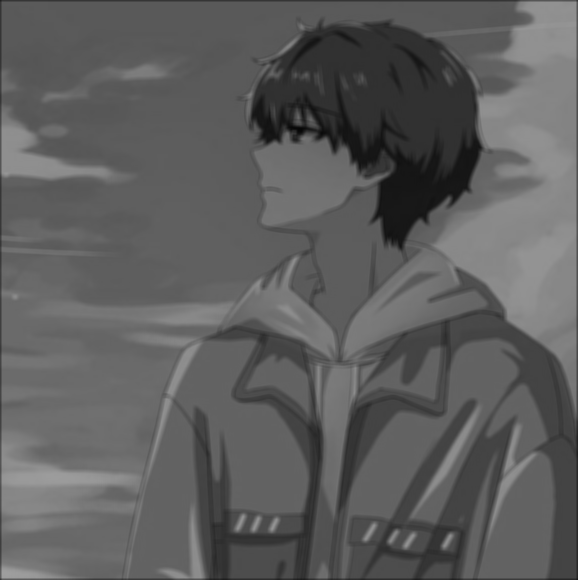

In [24]:
display(Image.fromarray(flower_gray))

# Geometric mean filter

In [25]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.prod(temp ** filter)
        flower_gray[i, j] = res

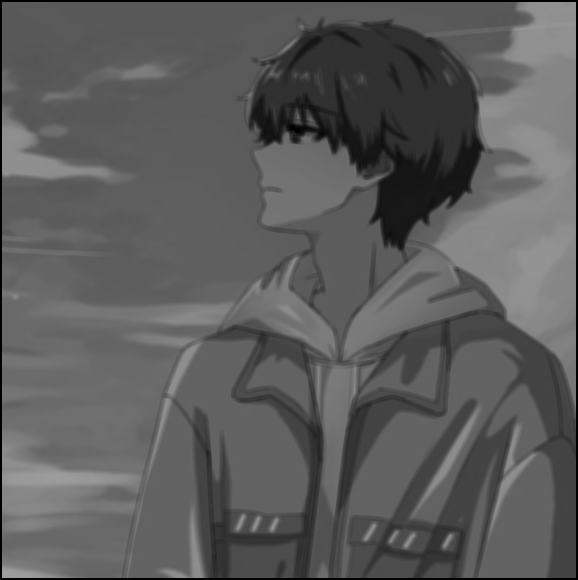

In [26]:
display(Image.fromarray(flower_gray))

# Harmonic mean filter

In [27]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = (filter_shape[0] * filter_shape[1]) // np.sum(np.reciprocal(temp))
        flower_gray[i, j] = res

<ipython-input-27-a19c8ee82495>:4: RuntimeWarning: divide by zero encountered in reciprocal
  res = (filter_shape[0] * filter_shape[1]) // np.sum(np.reciprocal(temp))


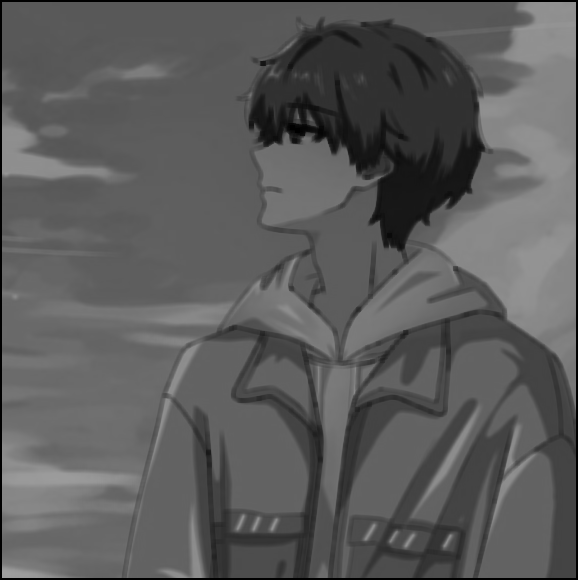

In [28]:
display(Image.fromarray(flower_gray))

# Contraharmonic mean filter

In [29]:
Q = -0.5
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = (np.sum(temp ** (Q + 1))) // (np.sum(temp ** Q))
        flower_gray[i, j] = res

<ipython-input-29-c88df01e9e9d>:5: RuntimeWarning: divide by zero encountered in power
  res = (np.sum(temp ** (Q + 1))) // (np.sum(temp ** Q))


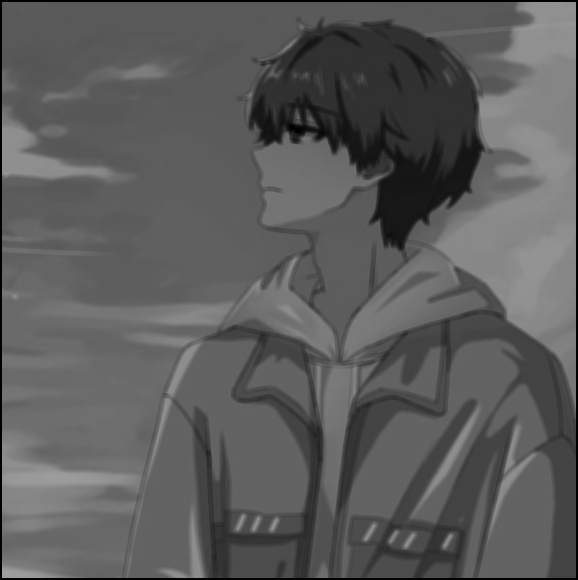

In [30]:
display(Image.fromarray(flower_gray))

# Order-statistic filters

## Median filter

In [31]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.median(temp)
        flower_gray[i, j] = res

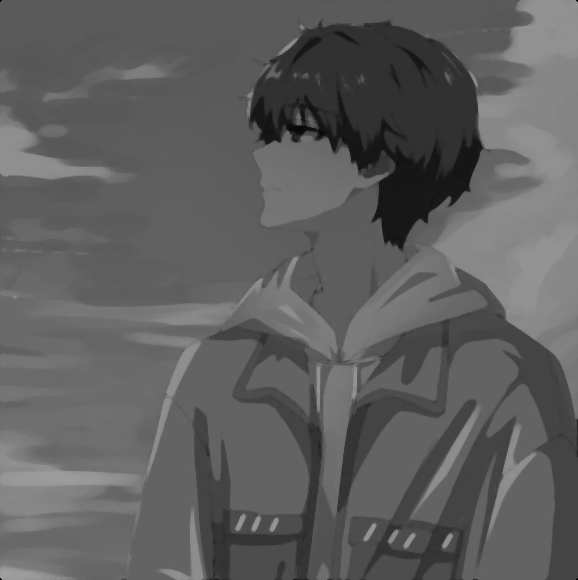

In [32]:
display(Image.fromarray(flower_gray))

# Max - min filter

In [33]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amax(temp)
        flower_gray[i, j] = res

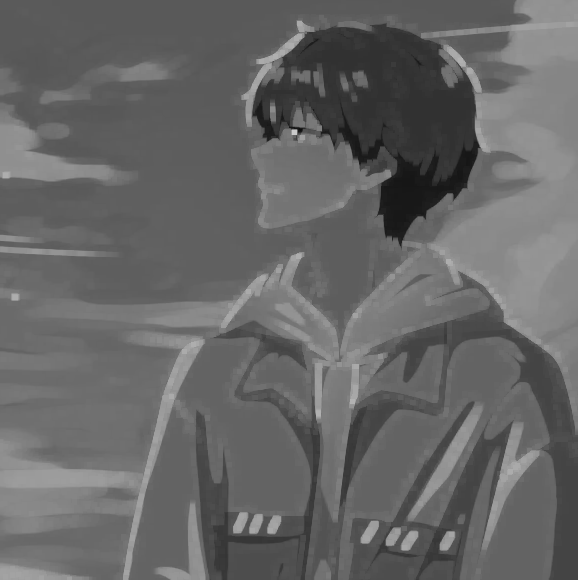

In [34]:
display(Image.fromarray(flower_gray))

In [35]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amin(temp)
        flower_gray[i, j] = res

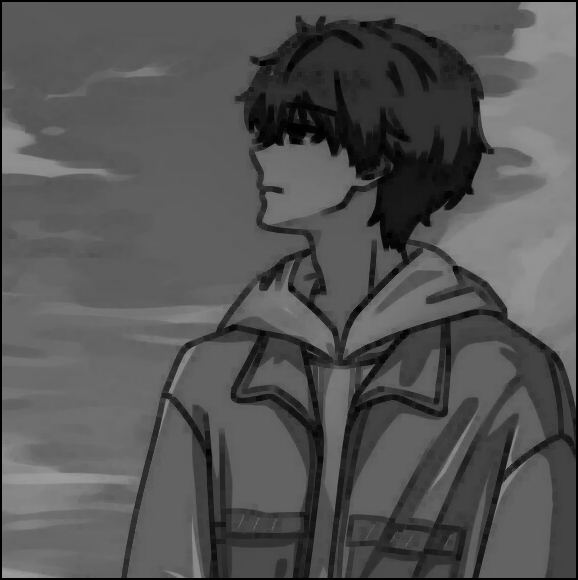

In [36]:
display(Image.fromarray(flower_gray))

# Midpoint filter

In [37]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amax(temp * (1/2)) + np.amin(temp * (1/2))
        flower_gray[i, j] = res

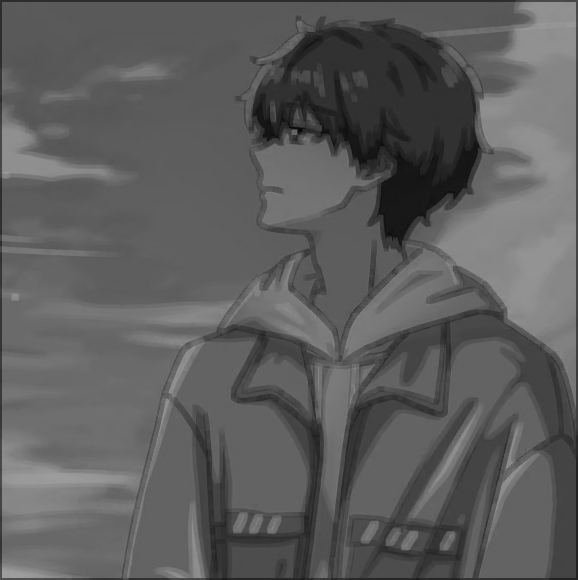

In [38]:
display(Image.fromarray(flower_gray))

# Alpha-trimmed mean filter

In [39]:
d = 2
filter = np.array([(1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1)]) * (1/25)

In [40]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]].copy()
        # max
        indices = temp.argpartition(temp.size - (d//2), axis = None)[-(d//2):]
        x, y = np.unravel_index(indices, temp.shape)
        temp[x, y] = 0
        
        # min
        indices = temp.argpartition(temp.size - (d//2), axis = None)[:(d//2)]
        x, y = np.unravel_index(indices, temp.shape)
        temp[x, y] = 0
        
        res = np.sum(temp * filter)
        flower_gray[i, j] = res

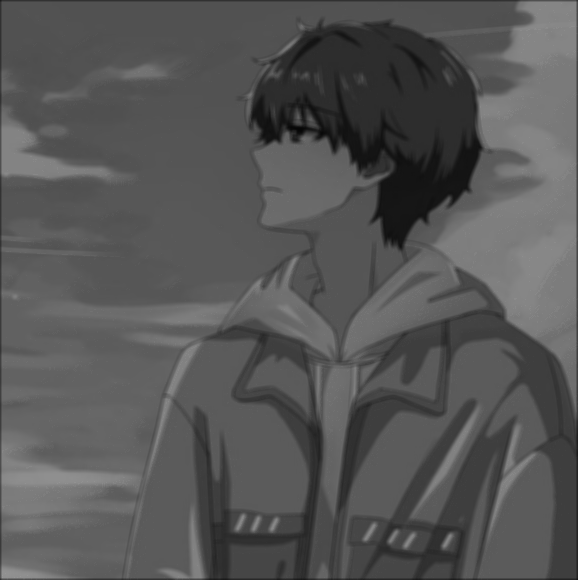

In [41]:
display(Image.fromarray(flower_gray))

# Adaptive filters

In [42]:
local_var = np.zeros((image_shape[0], image_shape[1]))
local_mean = np.zeros((image_shape[0], image_shape[1]))

for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        local_mean[i, j] = np.mean(temp)
        local_var[i, j] = np.mean(temp ** 2) - (local_mean[i, j] ** 2)     

In [43]:
local_var

array([[1.8662400e+03, 2.0217600e+03, 1.9440000e+03, ..., 4.9638816e+03,
        5.1941824e+03, 4.8220736e+03],
       [2.0217600e+03, 1.8662400e+03, 1.2960000e+03, ..., 3.3285504e+03,
        4.8199264e+03, 5.2481600e+03],
       [1.9440000e+03, 1.2960000e+03, 0.0000000e+00, ..., 2.3200000e+00,
        3.3652800e+03, 5.0698400e+03],
       ...,
       [5.8881984e+03, 3.9288576e+03, 4.6016000e+00, ..., 0.0000000e+00,
        7.3984000e+02, 1.1097600e+03],
       [6.0956800e+03, 5.6359936e+03, 3.8897376e+03, ..., 7.3984000e+02,
        1.0653696e+03, 1.1541504e+03],
       [5.6164800e+03, 6.0952800e+03, 5.8135904e+03, ..., 1.1097600e+03,
        1.1541504e+03, 1.0653696e+03]])

In [44]:
local_mean

array([[ 32.4 ,  43.2 ,  54.  , ...,  86.28,  69.24,  52.08],
       [ 43.2 ,  57.6 ,  72.  , ..., 115.36,  92.56,  69.6 ],
       [ 54.  ,  72.  ,  90.  , ..., 144.6 , 116.  ,  87.2 ],
       ...,
       [ 93.96, 125.32, 156.28, ...,  68.  ,  54.4 ,  40.8 ],
       [ 75.  , 100.08, 124.68, ...,  54.4 ,  43.52,  32.64],
       [ 56.2 ,  75.  ,  93.36, ...,  40.8 ,  32.64,  24.48]])

In [45]:
noise_var = np.sum(local_var) // len(local_var)
noise_var

66067.0

In [46]:
local_var = np.maximum(noise_var, local_var)

In [47]:
flower_gray = flower_gray - np.multiply((noise_var / local_var), (flower_gray - local_mean))


In [48]:
flower_gray = flower_gray.astype(np.uint8)

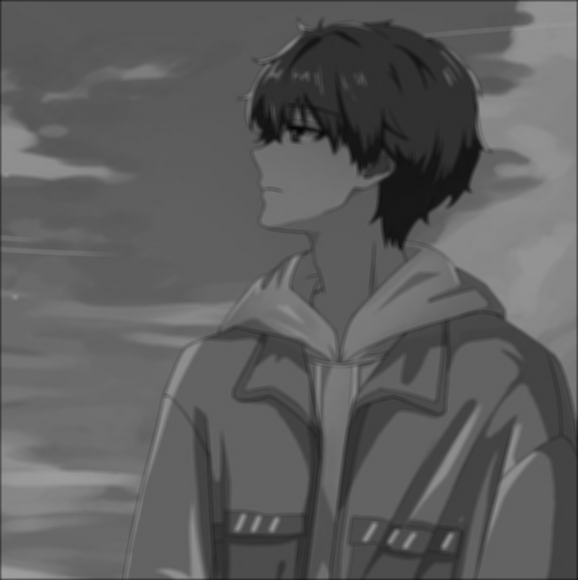

In [49]:
display(Image.fromarray(flower_gray))